In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

import pymongo

In [2]:
try:
    conn=pymongo.MongoClient()
    print ("Connected successfully!!!")
except pymongo.errors.ConnectionFailure as e:
    print ("Could not connect to MongoDB: {}s".format(e)) 
conn

Connected successfully!!!


MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [3]:
vscode = conn.vscode
vs = vscode.Issues

In [4]:
vs.find_one().keys()

dict_keys(['_id', 'className', 'url', 'number', 'title', 'body', 'state', 'creator', 'created_at', 'reponame', 'organization', 'comments', 'subscribed', 'mentioned', 'labeled'])

In [5]:
number = []
url = []
title = []
# body = []
state = []
creator = []
created_at = []
comments = []
mentioned = []
subscribed = []
labeled = []
unlabeled = []
status = []
assigned = []
unassigned = []
crossreference = []

for cursor in vs.find():
    number.append(cursor["number"])
    url.append(cursor["url"])
    title.append(cursor["title"])
#     body.append(cursor["body"])
    state.append(cursor["state"])
    creator.append(cursor["creator"])
    created_at.append(cursor["created_at"])
    comments.append(cursor["comments"])
    subscribed.append(cursor["subscribed"])
    mentioned.append(cursor["mentioned"])
    if "labeled" in cursor:
        labeled.append(cursor["labeled"])
    else:
        labeled.append(np.nan)
    if "status" in cursor:
        status.append(cursor["status"])
    else:
        status.append(np.nan)
    if "assigned" in cursor:
        assigned.append(cursor["assigned"])
    else:
        assigned.append(np.nan)    
    if "unassigned" in cursor:
        unassigned.append(cursor["unassigned"])
    else:
        unassigned.append(np.nan)
    if "crossReferences" in cursor:
        crossreference.append(cursor["crossReferences"])
    else:
        crossreference.append(np.nan)   
    if "unlabeled" in cursor:
        unlabeled.append(cursor["unlabeled"])
    else:
        unlabeled.append(np.nan)        

In [6]:
print("number of issues:", len(number))
print("number of url:", len(url))
print("number of title:", len(title))
print("number of state:", len(state))
print("number of creator:", len(creator))
print("number of created_at:", len(created_at))
print("number of comments:", len(comments))
print("number of subscribed:", len(subscribed))
print("number of labeled:", len(labeled))
print("number of status:", len(status))
print("number of assigned:", len(assigned))
print("number of unassigned:", len(unassigned))
print("number of crossreference:", len(crossreference))


number of issues: 52533
number of url: 52533
number of title: 52533
number of state: 52533
number of creator: 52533
number of created_at: 52533
number of comments: 52533
number of subscribed: 52533
number of labeled: 52533
number of status: 52533
number of assigned: 52533
number of unassigned: 52533
number of crossreference: 52533


In [7]:
df = pd.DataFrame()
df["number"] = number
df['url'] = url
df['title'] = title
df["state"] = state
df['creator'] = creator
df["created_at"] = created_at
df["comments"] = comments
df["subscribed"] = subscribed
df["mentioned"] = mentioned
df["labeled"] = labeled
df["unlabeled"] = unlabeled
df["status"] = status
df["assigned"] = assigned
df["unassigned"] = unassigned
df["crossreference"] = crossreference


In [8]:
df.tail()

,number,url,title,state,creator,created_at,comments,subscribed,mentioned,labeled,unlabeled,status,assigned,unassigned,crossreference
52528,5,https://api.github.com/repos/Microsoft/vscode/...,welcome.md packaged wrongly,closed,1926584,2015-11-13T16:48:18Z,0,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-14T05:42:28Z]]","[[900690, 2015-11-13T16:48:18Z], [1926584, 201...","[[900690, 2015-12-15T14:37:18Z]]",[https://api.github.com/repos/Microsoft/vscode...
52529,4,https://api.github.com/repos/Microsoft/vscode/...,"C# bracket insertion, indentation not working",closed,1487073,2015-11-13T16:45:06Z,1,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-16T11:29:58Z]]","[[5047891, 2015-11-13T16:45:06Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...
52530,3,https://api.github.com/repos/Microsoft/vscode/...,Omnisharp not included in Linux build,closed,1926584,2015-11-13T16:34:23Z,6,3,3,"[bug, verified]",NaN,"[[closed, 2015-11-14T06:32:48Z]]","[[1794099, 2015-11-13T16:45:45Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...
52531,2,https://api.github.com/repos/Microsoft/vscode/...,gulp-symdest does not preserve links on electron,closed,900690,2015-11-13T15:32:25Z,2,0,0,NaN,NaN,"[[closed, 2015-11-13T15:32:48Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...
52532,1,https://api.github.com/repos/Microsoft/vscode/...,Open Source VS Code,closed,1487073,2015-10-13T23:37:50Z,7,0,0,[Committed],[Committed],"[[closed, 2015-11-18T16:20:27Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...


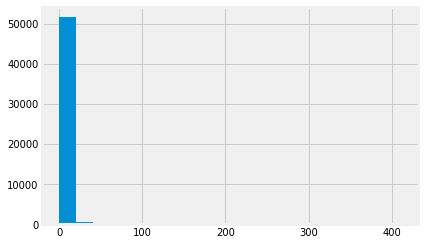

In [9]:
df.comments.hist(bins=20)

Very skewed distribuition, look at the small number of comments and high number of comments in separate

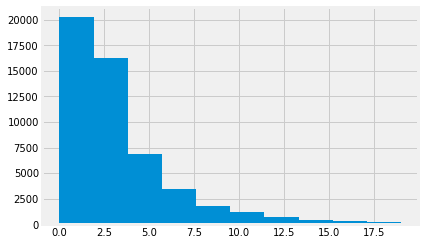

In [10]:
df[df["comments"]<20]["comments"].hist()

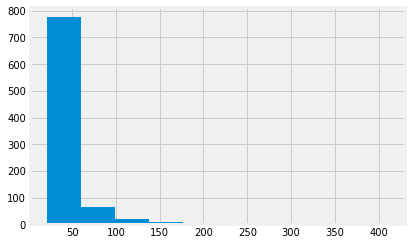

In [11]:
df[df["comments"]>20]["comments"].hist()

Probably the same happens with subscribed

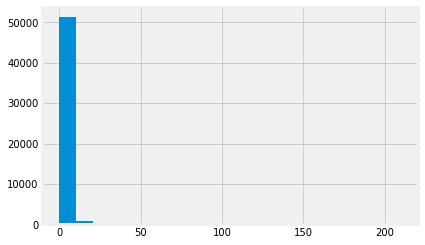

In [12]:
df.subscribed.hist(bins=20)

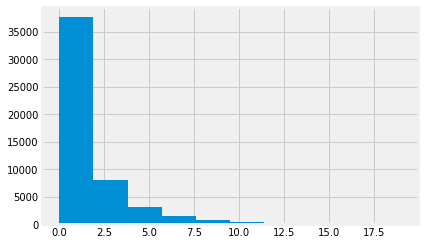

In [13]:
df[df["subscribed"]<20]["subscribed"].hist()

Look at the correlation between comments, subscribed and mentioned, they are probably high correlated

In [14]:
df[["comments", "subscribed", "mentioned"]].corr()

,comments,subscribed,mentioned
comments,1.000000,0.780738,0.823852
subscribed,0.780738,1.000000,0.944486
mentioned,0.823852,0.944486,1.000000


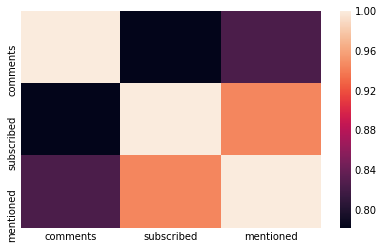

In [15]:
sns.heatmap(df[["comments", "subscribed", "mentioned"]].corr())

In [16]:
df.tail()

,number,url,title,state,creator,created_at,comments,subscribed,mentioned,labeled,unlabeled,status,assigned,unassigned,crossreference
52528,5,https://api.github.com/repos/Microsoft/vscode/...,welcome.md packaged wrongly,closed,1926584,2015-11-13T16:48:18Z,0,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-14T05:42:28Z]]","[[900690, 2015-11-13T16:48:18Z], [1926584, 201...","[[900690, 2015-12-15T14:37:18Z]]",[https://api.github.com/repos/Microsoft/vscode...
52529,4,https://api.github.com/repos/Microsoft/vscode/...,"C# bracket insertion, indentation not working",closed,1487073,2015-11-13T16:45:06Z,1,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-16T11:29:58Z]]","[[5047891, 2015-11-13T16:45:06Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...
52530,3,https://api.github.com/repos/Microsoft/vscode/...,Omnisharp not included in Linux build,closed,1926584,2015-11-13T16:34:23Z,6,3,3,"[bug, verified]",NaN,"[[closed, 2015-11-14T06:32:48Z]]","[[1794099, 2015-11-13T16:45:45Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...
52531,2,https://api.github.com/repos/Microsoft/vscode/...,gulp-symdest does not preserve links on electron,closed,900690,2015-11-13T15:32:25Z,2,0,0,NaN,NaN,"[[closed, 2015-11-13T15:32:48Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...
52532,1,https://api.github.com/repos/Microsoft/vscode/...,Open Source VS Code,closed,1487073,2015-10-13T23:37:50Z,7,0,0,[Committed],[Committed],"[[closed, 2015-11-18T16:20:27Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...


# we need to remove the issues labeled as duplicated

In [17]:
def duplicate_label(x):
    if x is np.nan:
        return 0
    elif "*duplicate" in x or "duplicate" in x:
        return 1
    else: return 0
    

In [18]:
df["duplicate"] = df.labeled.apply(duplicate_label)

In [19]:
df.duplicate.value_counts()

0    45356
1     7177
Name: duplicate, dtype: int64

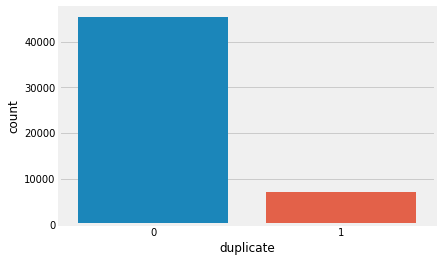

In [20]:
sns.countplot(df.duplicate)

In [21]:
df.columns

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate'],
      dtype='object')

In [22]:
# drop the duplicate issues
df = df.loc[df["duplicate"] == 0]

In [23]:
def count_labels(x):
    if x is np.nan:
        return 0
    else:
        return len(x)
    

In [24]:
df["n_labels"] = df.labeled.apply(count_labels)

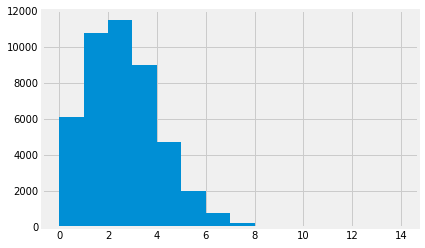

In [25]:
df["n_labels"].hist(bins=14)

In [26]:
df["n_labels"].value_counts()

2     11491
1     10761
3      9020
0      6147
4      4726
5      2031
6       771
7       265
8        94
9        33
10       12
11        3
14        1
13        1
Name: n_labels, dtype: int64

In [27]:
labels = []
for sublist in df.labeled.values:
    if sublist is not np.nan:
        for label in sublist:
            labels.append(label)

In [28]:
lab = pd.Series(labels)
lab.value_counts()

bug                     10903
verified                 9250
needs more info          8387
feature-request          7161
new release              3178
debug                    3152
workbench                2928
editor                   2547
upstream                 2112
integrated-terminal      1884
question                 1695
javascript               1636
extensions               1629
typescript               1486
cla-not-required         1302
git                      1292
verification-needed      1243
important                1142
as-designed              1089
insiders                 1071
api                      1050
help wanted               979
search                    893
testplan-item             866
tasks                     865
editor-core               860
debt                      744
ux                        680
accessibility             615
caused-by-extension       586
                        ...  
diagnostics                 2
ligatures                   2
python    

In [29]:
lab.value_counts()[:30]

bug                    10903
verified                9250
needs more info         8387
feature-request         7161
new release             3178
debug                   3152
workbench               2928
editor                  2547
upstream                2112
integrated-terminal     1884
question                1695
javascript              1636
extensions              1629
typescript              1486
cla-not-required        1302
git                     1292
verification-needed     1243
important               1142
as-designed             1089
insiders                1071
api                     1050
help wanted              979
search                   893
testplan-item            866
tasks                    865
editor-core              860
debt                     744
ux                       680
accessibility            615
caused-by-extension      586
dtype: int64

## divide labels

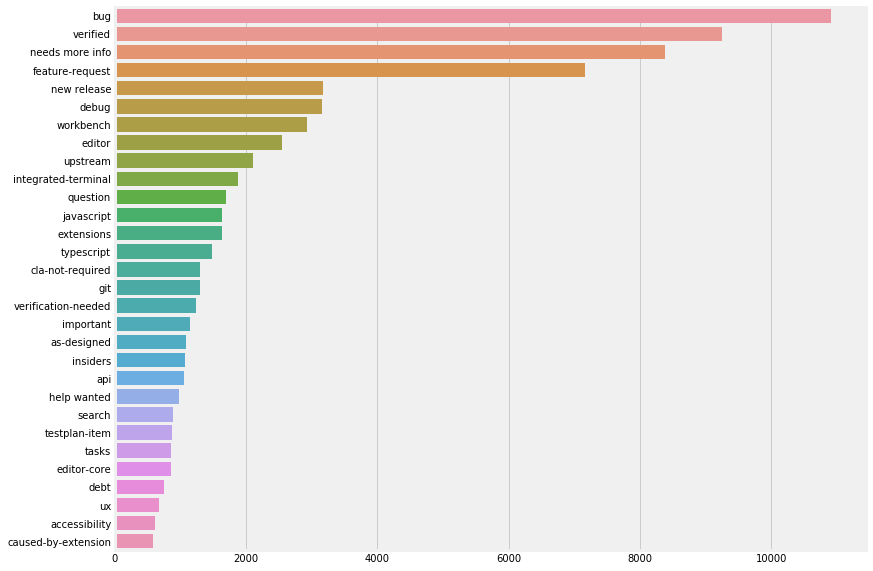

In [30]:
plt.figure(figsize=(12,10))
sns.barplot(x=lab.value_counts()[:30].values, y=lab.value_counts()[:30].index)

In [31]:
lab = pd.Series(labels)


In [32]:
lab.value_counts()[:30]

bug                    10903
verified                9250
needs more info         8387
feature-request         7161
new release             3178
debug                   3152
workbench               2928
editor                  2547
upstream                2112
integrated-terminal     1884
question                1695
javascript              1636
extensions              1629
typescript              1486
cla-not-required        1302
git                     1292
verification-needed     1243
important               1142
as-designed             1089
insiders                1071
api                     1050
help wanted              979
search                   893
testplan-item            866
tasks                    865
editor-core              860
debt                     744
ux                       680
accessibility            615
caused-by-extension      586
dtype: int64

## remove labels like "needs more info", "help wanted"

# create column for the number of status change

In [33]:
def count_status(x):
    if x is np.nan:
        return 0
    else:
        return len(x)

In [34]:
df["n_status"] = df.status.apply(count_status)

### if the n_status is larger than one the issue was re-opened at least once

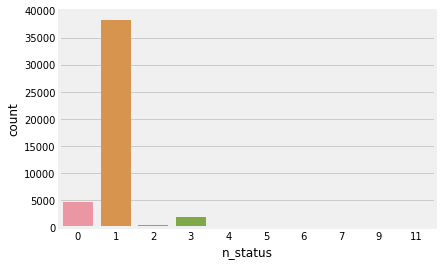

In [35]:
sns.countplot(df.n_status)

In [36]:
df.n_status.value_counts()

1     38193
0      4722
3      1890
2       344
5       154
4        28
7        17
6         4
9         3
11        1
Name: n_status, dtype: int64

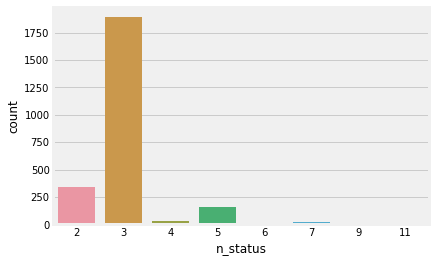

In [37]:
sns.countplot(df[df.n_status > 1]["n_status"])

In [38]:
df.tail()

,number,url,title,state,creator,created_at,comments,subscribed,mentioned,labeled,unlabeled,status,assigned,unassigned,crossreference,duplicate,n_labels,n_status
52528,5,https://api.github.com/repos/Microsoft/vscode/...,welcome.md packaged wrongly,closed,1926584,2015-11-13T16:48:18Z,0,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-14T05:42:28Z]]","[[900690, 2015-11-13T16:48:18Z], [1926584, 201...","[[900690, 2015-12-15T14:37:18Z]]",[https://api.github.com/repos/Microsoft/vscode...,0,2,1
52529,4,https://api.github.com/repos/Microsoft/vscode/...,"C# bracket insertion, indentation not working",closed,1487073,2015-11-13T16:45:06Z,1,0,0,"[bug, verified]",NaN,"[[closed, 2015-11-16T11:29:58Z]]","[[5047891, 2015-11-13T16:45:06Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...,0,2,1
52530,3,https://api.github.com/repos/Microsoft/vscode/...,Omnisharp not included in Linux build,closed,1926584,2015-11-13T16:34:23Z,6,3,3,"[bug, verified]",NaN,"[[closed, 2015-11-14T06:32:48Z]]","[[1794099, 2015-11-13T16:45:45Z]]",NaN,[https://api.github.com/repos/Microsoft/vscode...,0,2,1
52531,2,https://api.github.com/repos/Microsoft/vscode/...,gulp-symdest does not preserve links on electron,closed,900690,2015-11-13T15:32:25Z,2,0,0,NaN,NaN,"[[closed, 2015-11-13T15:32:48Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...,0,0,1
52532,1,https://api.github.com/repos/Microsoft/vscode/...,Open Source VS Code,closed,1487073,2015-10-13T23:37:50Z,7,0,0,[Committed],[Committed],"[[closed, 2015-11-18T16:20:27Z]]",NaN,NaN,[https://api.github.com/repos/Microsoft/vscode...,0,1,1


# create column with date it was closed, calculate time it was open

In [39]:
df.status.values[-1][-1][0]

'closed'

In [40]:
def closed_at(x):
    if x is np.nan:
        return 0
    elif x[-1][0] == "closed": 
        return x[-1][1]
    else:return 0
    

In [41]:
df["closed_at"] = df.status.apply(closed_at)

In [42]:
df.loc[29]

number                                                        52690
url               https://api.github.com/repos/Microsoft/vscode/...
title                                   Regex should not be failing
state                                                          open
creator                                                      520541
created_at                                     2018-06-22T13:44:51Z
comments                                                          2
subscribed                                                        0
mentioned                                                         0
labeled                                                    [search]
unlabeled                                                       NaN
status                             [[closed, 2018-06-24T00:47:51Z]]
assigned                           [[323878, 2018-06-22T13:45:11Z]]
unassigned                                                      NaN
crossreference                                  

In [43]:
df[df.closed_at != -1].state.value_counts()

closed    40237
open       5119
Name: state, dtype: int64

In [44]:
df[df.closed_at != -1][["state", "closed_at", "status"]]

,state,closed_at,status
0,open,0,NaN
1,open,0,NaN
2,open,0,NaN
3,open,0,"[[closed, 2018-06-23T02:09:41Z], [reopened, 20..."
4,open,2018-06-23T16:20:37Z,"[[closed, 2018-06-23T16:20:37Z]]"
5,open,0,NaN
6,open,0,NaN
7,open,0,NaN
8,open,0,NaN
9,open,0,NaN


In [45]:
df.columns

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at'],
      dtype='object')

In [46]:
df['open_date'] = pd.to_datetime(df["created_at"])
df["close_date"] = pd.to_datetime(df["closed_at"])

### Calculate how many days and hours the issues were open

In [47]:
# aproximately the data it was scraped, to calculate how many hours the issues are open
current_date = pd.to_datetime("2018-06-25")

In [48]:
df["time_open"] = df.apply(lambda row: row["close_date"] - row["open_date"] if row["closed_at"] != 0 
                           else current_date - row["open_date"], axis=1)


In [49]:
df["hours_open"] = df["time_open"].apply(lambda x: x.total_seconds()/3600)

In [50]:
df[["hours_open", "time_open", "state", "closed_at", "created_at"]][:20]

,hours_open,time_open,state,closed_at,created_at
0,43.057500,1 days 19:03:27,open,0,2018-06-23T04:56:33Z
1,44.376944,1 days 20:22:37,open,0,2018-06-23T03:37:23Z
2,44.916389,1 days 20:54:59,open,0,2018-06-23T03:05:01Z
3,45.851944,1 days 21:51:07,open,0,2018-06-23T02:08:53Z
4,14.828889,0 days 14:49:44,open,2018-06-23T16:20:37Z,2018-06-23T01:30:53Z
5,48.557222,2 days 00:33:26,open,0,2018-06-22T23:26:34Z
6,49.308056,2 days 01:18:29,open,0,2018-06-22T22:41:31Z
7,49.544167,2 days 01:32:39,open,0,2018-06-22T22:27:21Z
8,49.668333,2 days 01:40:06,open,0,2018-06-22T22:19:54Z
9,49.843889,2 days 01:50:38,open,0,2018-06-22T22:09:22Z


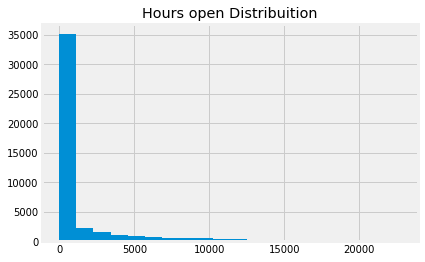

In [51]:
df["hours_open"].hist(bins=20)
plt.title("Hours open Distribuition");

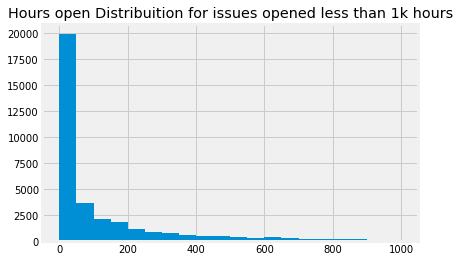

In [52]:
df[df["hours_open"] < 1000]["hours_open"].hist(bins=20)
plt.title("Hours open Distribuition for issues opened less than 1k hours");

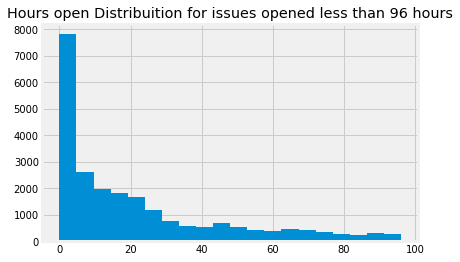

In [53]:
df[df["hours_open"] < 96]["hours_open"].hist(bins=20)
plt.title("Hours open Distribuition for issues opened less than 96 hours");

In [54]:
# all issues
df["hours_open"].describe()

count    45356.000000
mean      1536.800555
std       3482.267406
min          0.000556
25%         11.721319
50%         84.309444
75%        816.738958
max      22782.680833
Name: hours_open, dtype: float64

In [55]:
# only open issues
df[df["closed_at"] == 0]["hours_open"].describe()

count     5096.000000
mean      6499.904308
std       5840.153440
min         43.057500
25%       1673.606597
50%       4779.059306
75%      10142.505347
max      22782.680833
Name: hours_open, dtype: float64

In [56]:
# only closed issues
df[df["closed_at"] != 0]["hours_open"].describe()

count    40260.000000
mean       908.584541
std       2414.953408
min          0.000556
25%          8.718472
50%         52.170278
75%        365.031458
max      22591.948056
Name: hours_open, dtype: float64

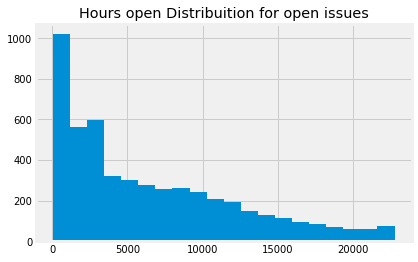

In [57]:
df[df["closed_at"] == 0]["hours_open"].hist(bins=20)
plt.title("Hours open Distribuition for open issues");

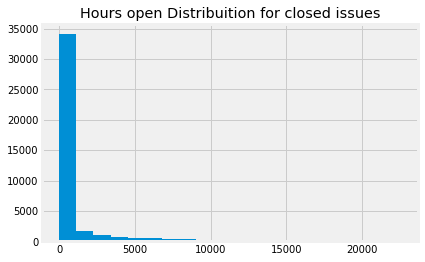

In [58]:
df[df["closed_at"] != 0]["hours_open"].hist(bins=20)
plt.title("Hours open Distribuition for closed issues");

In [59]:
# df[(df["hours_open"] >= 0) & (df["hours_open"] < 5000)]["hours_open"].describe()

### See if there is a difference between issues opened in different days of the week

In [60]:
df["day_week"] = df["open_date"].apply(lambda x: x.dayofweek)

In [61]:
weekday = df[["day_week", "hours_open"]].groupby("day_week").mean()

***Monday = 0 , Sunday = 6***

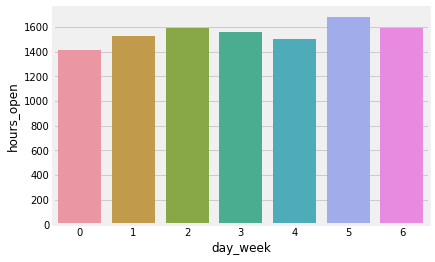

In [62]:
sns.barplot(x=weekday.index, y="hours_open", data=weekday);

In [63]:
weekday

,hours_open
day_week,
0,1410.088569
1,1524.684219
2,1596.458404
3,1558.139037
4,1501.537593
5,1680.070304
6,1590.694742


***the difference doesn't seems to be significative, but this might be important in a professional setting***

## First and last user assigned to an issue

In [64]:
def last_assigned(x):
    if x is np.nan:
        return -1
    else: return x[-1][0]
    
def first_assigned(x):
    if x is np.nan:
        return -1
    else: return x[0][0]
    

In [65]:
df["last_assigned"] = df["assigned"].apply(last_assigned)
df["first_assigned"] = df["assigned"].apply(first_assigned)

In [66]:
df.last_assigned.value_counts()[:20]

-1          6707
900690      5165
22350       4015
12821956    3660
5047891     3260
6461412     3165
1926584     2929
2193314     2640
1794099     2436
10746682    1909
1931590     1514
323878      1370
1898161     1345
876920       997
9205389      778
16890566     775
172399       441
2449568      330
4674940      258
1487073      199
Name: last_assigned, dtype: int64

In [67]:
df.first_assigned.value_counts()[:20]

-1          6707
900690      5719
22350       4289
12821956    3337
5047891     3129
6461412     3046
1926584     2897
2193314     2745
1794099     2534
1931590     1656
10746682    1594
1898161     1508
323878      1344
876920      1223
9205389      721
16890566     672
172399       447
2449568      352
4674940      236
1487073      173
Name: first_assigned, dtype: int64

### Average open hours of the issues by user

In [68]:
df[["first_assigned", "hours_open"]].groupby("first_assigned").agg(["mean", "count"])\
                                    .sort_values(by=[("hours_open", "count")], ascending=False)

hours_open      
                        mean count
first_assigned                    
-1                680.817974  6707
900690           1995.678753  5719
22350            1540.191021  4289
12821956          616.934266  3337
5047891          3155.489862  3129
6461412          1476.148859  3046
1926584          1320.849920  2897
2193314          1137.316244  2745
1794099          1568.670845  2534
1931590          2242.310993  1656
10746682         1782.632254  1594
1898161          1716.214508  1508
323878           1105.911258  1344
876920           2793.077402  1223
9205389          1367.904200   721
16890566          746.161311   672
172399           1420.926065   447
2449568          1574.062989   352
4674940          2094.726153   236
1487073          3261.047442   173
3672607           397.360268   144
11839736         3575.560657   112
2239563          1554.859460    92
4033249           880.973235    79
19785531         3183.594979    67
1051190          3568.432251    67
762848           3219.778418    66
1704059          5441.315751    61
12818376          788.207615    46
2146228          1511.965207    39
17869538         1506.852909    38
15158320          721.281608    33
25272315          404.255486    32
6561887           322.724751    29
35271042          106.019455    26
13241824          260.105111    25
173559            939.950519    23
5607882          1287.377894    12
8586769            63.496556    10
856858           4830.573889     6
79405             707.625880     6
1948812          1152.673333     4
5591113           188.340000     3
242340           1113.704815     3
6494226          4912.123056     2
7251102         10564.770833     1
212305          10330.209167     1

In [69]:
df.columns

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at', 'open_date', 'close_date', 'time_open', 'hours_open',
       'day_week', 'last_assigned', 'first_assigned'],
      dtype='object')

### How many assignemnts and unassignement there were for each issue:

In [70]:
df["n_assigned"] = df["assigned"].apply(lambda x: len(x) if x is not np.nan else 0)

In [71]:
df["n_unassigned"] = df["unassigned"].apply(lambda x: len(x) if x is not np.nan else 0)

In [72]:
df[["n_assigned", "assigned", "n_unassigned"]][-20:]

,n_assigned,assigned,n_unassigned
52513,3,"[[6461412, 2015-11-16T09:01:48Z], [5047891, 20...",2
52514,3,"[[6461412, 2015-11-16T08:49:55Z], [5047891, 20...",2
52515,2,"[[6461412, 2015-11-16T08:45:27Z], [22350, 2015...",1
52516,2,"[[6461412, 2015-11-16T08:05:42Z], [5047891, 20...",1
52517,1,"[[6461412, 2015-11-16T07:45:57Z]]",0
52518,2,"[[6461412, 2015-11-16T07:28:06Z], [5047891, 20...",1
52519,2,"[[6461412, 2015-11-16T07:22:24Z], [900690, 201...",1
52520,1,"[[6461412, 2015-11-16T07:20:42Z]]",0
52521,2,"[[6461412, 2015-11-16T07:02:43Z], [900690, 201...",1
52522,3,"[[22350, 2015-11-16T06:44:40Z], [900690, 2015-...",2


In [73]:
df[["first_assigned", "hours_open", "n_assigned", "n_unassigned"]].groupby("first_assigned")\
                            .agg({"hours_open": ["mean", "count"], "n_assigned":"mean", "n_unassigned":"mean"})\
                            .sort_values(by=[("hours_open", "count")], ascending=False)

hours_open       n_assigned n_unassigned
                        mean count       mean         mean
first_assigned                                            
-1                680.817974  6707   0.000000     0.000000
900690           1995.678753  5719   1.497290     0.556041
22350            1540.191021  4289   1.368384     0.389601
12821956          616.934266  3337   1.126761     0.092898
5047891          3155.489862  3129   1.381272     0.512943
6461412          1476.148859  3046   1.288575     0.282009
1926584          1320.849920  2897   1.525371     0.566793
2193314          1137.316244  2745   1.237158     0.201457
1794099          1568.670845  2534   1.471586     0.445146
1931590          2242.310993  1656   1.474638     0.483696
10746682         1782.632254  1594   1.300502     0.316186
1898161          1716.214508  1508   1.637931     0.669761
323878           1105.911258  1344   1.358631     0.305060
876920           2793.077402  1223   1.560916     0.491415
9205389          1367.904200   721   1.296810     0.252427
16890566          746.161311   672   1.211310     0.205357
172399           1420.926065   447   1.552573     0.534676
2449568          1574.062989   352   1.562500     0.386364
4674940          2094.726153   236   1.546610     0.351695
1487073          3261.047442   173   1.710983     0.693642
3672607           397.360268   144   1.048611     0.062500
11839736         3575.560657   112   1.928571     0.910714
2239563          1554.859460    92   1.728261     0.630435
4033249           880.973235    79   1.620253     0.544304
19785531         3183.594979    67   1.104478     0.089552
1051190          3568.432251    67   1.820896     0.611940
762848           3219.778418    66   2.136364     1.257576
1704059          5441.315751    61   2.131148     0.819672
12818376          788.207615    46   1.152174     0.195652
2146228          1511.965207    39   1.538462     0.538462
17869538         1506.852909    38   2.289474     1.315789
15158320          721.281608    33   1.181818     0.757576
25272315          404.255486    32   1.187500     0.062500
6561887           322.724751    29   1.206897     0.206897
35271042          106.019455    26   1.115385     0.153846
13241824          260.105111    25   1.360000     0.320000
173559            939.950519    23   2.521739     2.000000
5607882          1287.377894    12   1.333333     1.083333
8586769            63.496556    10   1.400000     0.200000
856858           4830.573889     6   2.833333     1.833333
79405             707.625880     6   1.500000     0.333333
1948812          1152.673333     4   1.000000     0.250000
5591113           188.340000     3   2.333333     2.000000
242340           1113.704815     3   1.000000     0.000000
6494226          4912.123056     2   4.000000     3.000000
7251102         10564.770833     1   1.000000     1.000000
212305          10330.209167     1   2.000000     1.000000

## same as above but with outliers removed

In [74]:
df[["last_assigned", "hours_open", "n_assigned", "n_unassigned"]].groupby("last_assigned")\
                            .agg({"hours_open": ["mean", "count"], "n_assigned":"mean", "n_unassigned":"mean"})\
                            .sort_values(by=[("hours_open", "count")], ascending=False)

hours_open       n_assigned n_unassigned
                       mean count       mean         mean
last_assigned                                            
-1               680.817974  6707   0.000000     0.000000
900690          1977.455942  5165   1.384898     0.499322
22350           1436.600405  4015   1.275467     0.317559
12821956         934.931429  3660   1.247814     0.195902
5047891         3175.787978  3260   1.421166     0.528834
6461412         1342.347350  3165   1.336177     0.319115
1926584         1345.729509  2929   1.537043     0.590304
2193314         1169.732649  2640   1.199242     0.167803
1794099         1451.989532  2436   1.433908     0.404351
10746682        1769.268498  1909   1.486642     0.440545
1931590         2253.928800  1514   1.366579     0.384412
323878          1366.522023  1370   1.367883     0.331387
1898161         1832.744680  1345   1.530855     0.542007
876920          3320.588439   997   1.404213     0.394183
9205389         1379.450755   778   1.487147     0.398458
16890566         829.094421   775   1.421935     0.423226
172399          1051.306185   441   1.439909     0.455782
2449568          814.298471   330   1.518182     0.409091
4674940         1467.380056   258   1.670543     0.496124
1487073         3411.410613   199   1.673367     0.623116
3672607          506.250079   176   1.244318     0.295455
11839736        1858.731259   161   2.372671     0.627329
1704059         6666.797402   116   2.224138     1.146552
12818376         643.856648   104   1.980769     0.875000
4033249         1185.854750   101   1.673267     0.475248
19785531        2846.042273    98   1.448980     0.387755
2239563          413.817024    91   1.670330     0.780220
1051190         5152.281936    63   1.777778     0.603175
6561887          738.313630    59   1.847458     0.949153
35271042        1250.865512    57   1.964912     0.508772
18324331         298.470219    57   2.807018     1.789474
13241824        1847.238949    55   1.745455     0.472727
25272315        1081.951058    47   1.595745     0.404255
15158320         488.452703    37   1.459459     1.135135
5607882         2223.530728    29   1.827586     1.310345
2146228          411.173930    27   1.148148     0.222222
8586769         1088.453656    25   2.040000     0.440000
762848           665.907963    24   1.708333     0.916667
17869538         150.750868    24   2.000000     0.958333
12900364          92.915302    23   2.391304     1.391304
173559          1673.756703    23   2.391304     1.391304
79405           3256.232347    20   1.950000     1.050000
17735796          96.686329    14   2.357143     1.357143
1948812         1764.683829    14   2.142857     1.214286
6909617         8520.635444     5   3.200000     1.200000
242340           849.357292     4   1.250000     0.250000
7109548           30.257222     2   2.000000     1.500000
18324209         295.260972     2   2.500000     1.000000
5591113          451.124167     1   1.000000     0.000000
6344099          279.918611     1   4.000000     2.000000
7251102        10564.770833     1   1.000000     1.000000
8125011         6931.136111     1   9.000000     8.000000
223467         10707.985833     1   2.000000     1.000000

In [75]:
df[["hours_open", "n_assigned", "n_unassigned"]].corr()

,hours_open,n_assigned,n_unassigned
hours_open,1.000000,0.126997,0.204689
n_assigned,0.126997,1.000000,0.804018
n_unassigned,0.204689,0.804018,1.000000


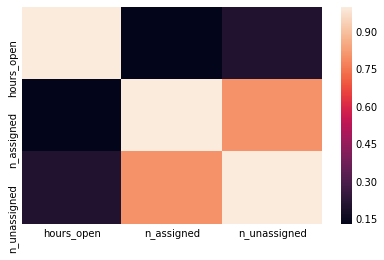

In [76]:
sns.heatmap(df[["hours_open", "n_assigned", "n_unassigned"]].corr())

***there is some correlation between the number of assigments and reassignments and how many hours the issue was open but i was expecting a stronger correlation***

In [77]:
# df_closed[["hours_open", "n_assigned", "n_unassigned"]].corr()

In [78]:
# sns.heatmap(df_closed[["hours_open", "n_assigned"]].corr())

## Check the evolution of the number of open issues:

In [79]:
def total_closed_issues(date):
    date = pd.to_datetime(date)
    sum_closed_issues = (df["close_date"] <= date).sum()
#     count the ones that are still open, date of close of 1970
    open_issues = (df["close_date"] <= pd.to_datetime("2010")).sum()
    return sum_closed_issues - open_issues

In [80]:
df['total_closed'] = df["open_date"].apply(total_closed_issues)

In [81]:
df.reset_index(inplace=True)
df.drop(["index"], inplace=True, axis=1)

In [82]:
total_opened_issues = df.shape[0] - df.index
df["total_open_issues_when_created"] = total_opened_issues - df["total_closed"]

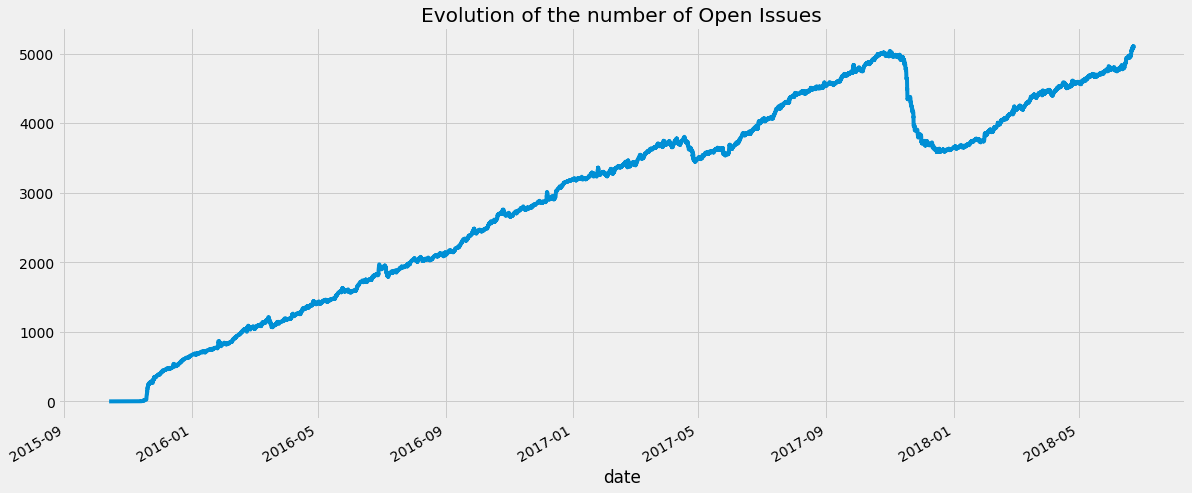

In [186]:
df[["open_date", "total_open_issues_when_created"]].set_index("open_date").plot(figsize=(18,8))
plt.title("Evolution of the number of Open Issues");
plt.legend().set_visible(False);
plt.xlabel("date");

In [84]:
df.head()

,number,url,title,state,creator,created_at,comments,subscribed,mentioned,labeled,...,close_date,time_open,hours_open,day_week,last_assigned,first_assigned,n_assigned,n_unassigned,total_closed,total_open_issues_when_created
0,52719,https://api.github.com/repos/Microsoft/vscode/...,The extensions stops working,open,18577289,2018-06-23T04:56:33Z,1,0,0,[extensions],...,1970-01-01 00:00:00,1 days 19:03:27,43.057500,5,-1,-1,0,0,40235,5121
1,52718,https://api.github.com/repos/Microsoft/vscode/...,Display function param type details instead of...,open,499364,2018-06-23T03:37:23Z,0,0,0,[javascript],...,1970-01-01 00:00:00,1 days 20:22:37,44.376944,5,12821956,12821956,1,0,40235,5120
2,52717,https://api.github.com/repos/Microsoft/vscode/...,Setting to change the image preview background,open,8916053,2018-06-23T03:05:01Z,1,1,1,NaN,...,1970-01-01 00:00:00,1 days 20:54:59,44.916389,5,-1,-1,0,0,40235,5119
3,52716,https://api.github.com/repos/Microsoft/vscode/...,"When I use extension management, the applicati...",open,5129173,2018-06-23T02:08:53Z,0,0,0,NaN,...,1970-01-01 00:00:00,1 days 21:51:07,45.851944,5,-1,-1,0,0,40235,5118
4,52715,https://api.github.com/repos/Microsoft/vscode/...,Attach to process: cannot put process '18117' ...,open,5215504,2018-06-23T01:30:53Z,1,0,0,"[debug, question]",...,2018-06-23 16:20:37,0 days 14:49:44,14.828889,5,1898161,1898161,1,0,40235,5117


## According to github most of the open issues have the label feature request, maybe that's why they are open for so long

In [85]:
df["feature-request"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "feature-request" in x else 0))

In [86]:
df.head()

,number,url,title,state,creator,created_at,comments,subscribed,mentioned,labeled,...,time_open,hours_open,day_week,last_assigned,first_assigned,n_assigned,n_unassigned,total_closed,total_open_issues_when_created,feature-request
0,52719,https://api.github.com/repos/Microsoft/vscode/...,The extensions stops working,open,18577289,2018-06-23T04:56:33Z,1,0,0,[extensions],...,1 days 19:03:27,43.057500,5,-1,-1,0,0,40235,5121,0
1,52718,https://api.github.com/repos/Microsoft/vscode/...,Display function param type details instead of...,open,499364,2018-06-23T03:37:23Z,0,0,0,[javascript],...,1 days 20:22:37,44.376944,5,12821956,12821956,1,0,40235,5120,0
2,52717,https://api.github.com/repos/Microsoft/vscode/...,Setting to change the image preview background,open,8916053,2018-06-23T03:05:01Z,1,1,1,NaN,...,1 days 20:54:59,44.916389,5,-1,-1,0,0,40235,5119,0
3,52716,https://api.github.com/repos/Microsoft/vscode/...,"When I use extension management, the applicati...",open,5129173,2018-06-23T02:08:53Z,0,0,0,NaN,...,1 days 21:51:07,45.851944,5,-1,-1,0,0,40235,5118,0
4,52715,https://api.github.com/repos/Microsoft/vscode/...,Attach to process: cannot put process '18117' ...,open,5215504,2018-06-23T01:30:53Z,1,0,0,"[debug, question]",...,0 days 14:49:44,14.828889,5,1898161,1898161,1,0,40235,5117,0


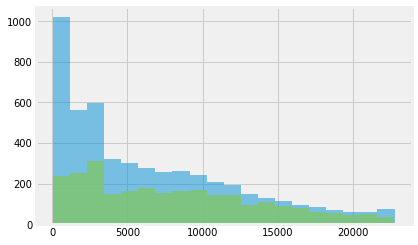

In [87]:
df[(df["closed_at"] == 0) & (df["feature-request"] == 1)]["hours_open"].hist(bins=20, alpha=0.8, color="yellow")
df[df["closed_at"] == 0]["hours_open"].hist(bins=20, alpha=0.5)

# plt.title("Hours open Distribuition for open issues");

In [88]:
df[(df["closed_at"] == 0) & (df["feature-request"] == 1)]["hours_open"].describe()

count     2706.000000
mean      8159.951397
std       5842.567709
min         49.308056
25%       2960.716111
50%       7219.471528
75%      12157.567431
max      22764.078889
Name: hours_open, dtype: float64

In [89]:
df[(df["closed_at"] == 0)]["hours_open"].describe()

count     5096.000000
mean      6499.904308
std       5840.153440
min         43.057500
25%       1673.606597
50%       4779.059306
75%      10142.505347
max      22782.680833
Name: hours_open, dtype: float64

## Reassignments

In [90]:
unassigned = df[df["n_unassigned"] > 0]

In [91]:
unassigned.shape

(11279, 31)

In [92]:
print("% of reassignments: {}%".format(round(unassigned.shape[0]/df.shape[0]*100, 2)))
df.shape

% of reassignments: 24.87%


(45356, 31)

In [93]:
df.columns

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at', 'open_date', 'close_date', 'time_open', 'hours_open',
       'day_week', 'last_assigned', 'first_assigned', 'n_assigned',
       'n_unassigned', 'total_closed', 'total_open_issues_when_created',
       'feature-request'],
      dtype='object')

In [94]:
df["bug"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "bug" in x else 0))
df["verified"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "verified" in x else 0))
df["needs_info"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "needs more info" in x else 0))
df["release"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "new release" in x else 0))
df["debug"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "debug" in x else 0))
df["workbench"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "workbench" in x else 0))
df["editor"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "editor" in x else 0))
df["upstream"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "upstream" in x else 0))
df["javascript"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "javascript" in x else 0))
df["question"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "question" in x else 0))
df["terminal"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "integrated-terminal" in x else 0))
df["extensions"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "extensions" in x else 0))
df["typescript"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "typescript" in x else 0))
df["cla"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "cla-not-required" in x else 0))
df["git"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "git" in x else 0))
df["important"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "important" in x else 0))
df["verification"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "verification-needed" in x else 0))
df["help"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "help wanted" in x else 0))
df["insiders"] = df["labeled"].apply(lambda x: 0 if x is np.nan else (1 if "insiders" in x else 0))

In [95]:
label_cols = df.columns[-20:]
label_cols

Index(['feature-request', 'bug', 'verified', 'needs_info', 'release', 'debug',
       'workbench', 'editor', 'upstream', 'javascript', 'question', 'terminal',
       'extensions', 'typescript', 'cla', 'git', 'important', 'verification',
       'help', 'insiders'],
      dtype='object')

In [96]:
correlation = df[label_cols].corr(method="spearman")
correlation

,feature-request,bug,verified,needs_info,release,debug,workbench,editor,upstream,javascript,question,terminal,extensions,typescript,cla,git,important,verification,help,insiders
feature-request,1.000000,-0.173901,-0.050404,-0.121863,-0.046786,0.047519,0.165343,0.109901,-0.041808,-0.033586,-0.040095,-0.008482,0.013992,-0.009959,-0.065415,0.023953,-0.060667,0.259651,0.141677,-0.021054
bug,-0.173901,1.000000,0.646220,-0.056189,-0.032237,0.095249,0.015091,-0.004783,0.076736,-0.043082,-0.077594,0.059529,-0.004453,-0.003016,-0.090983,0.043604,0.219257,-0.041541,0.079474,0.059433
verified,-0.050404,0.646220,1.000000,-0.120947,-0.065164,0.093742,-0.007397,-0.028231,-0.017019,-0.050908,-0.078727,0.034258,-0.007805,-0.012078,-0.079182,0.004604,0.217007,0.295010,0.043203,0.039164
needs_info,-0.121863,-0.056189,-0.120947,1.000000,0.103842,-0.021176,0.009696,0.002993,0.031931,0.066513,-0.037184,0.059093,0.033926,0.045041,-0.078270,0.020967,-0.020044,-0.053075,-0.013110,0.010635
release,-0.046786,-0.032237,-0.065164,0.103842,1.000000,-0.002669,0.047337,0.046349,0.043614,0.061855,-0.004369,0.006797,0.041190,0.003989,-0.046562,0.016349,-0.033290,-0.017482,-0.000913,-0.042660
debug,0.047519,0.095249,0.093742,-0.021176,-0.002669,1.000000,-0.065207,-0.064309,-0.042488,-0.046991,0.002935,-0.041610,-0.044178,-0.045315,-0.041392,-0.044772,0.005203,0.035244,-0.014727,-0.002695
workbench,0.165343,0.015091,-0.007397,0.009696,0.047337,-0.065207,1.000000,-0.025343,0.053943,-0.047513,-0.016085,-0.042347,-0.039769,-0.042581,-0.042592,-0.026435,-0.010902,0.031770,0.054250,0.016002
editor,0.109901,-0.004783,-0.028231,0.002993,0.046349,-0.064309,-0.025343,1.000000,0.002123,-0.029057,-0.006427,-0.038498,-0.041511,-0.027711,-0.040715,-0.036266,-0.018542,0.000876,-0.007265,0.008313
upstream,-0.041808,0.076736,-0.017019,0.031931,0.043614,-0.042488,0.053943,0.002123,1.000000,0.227706,-0.034505,0.080290,-0.030335,0.218928,-0.036727,-0.033093,0.001229,-0.016618,0.037415,0.009341
javascript,-0.033586,-0.043082,-0.050908,0.066513,0.061855,-0.046991,-0.047513,-0.029057,0.227706,1.000000,-0.003762,-0.036593,-0.031985,0.268057,-0.032809,-0.032241,-0.023288,0.004262,-0.017836,0.008906


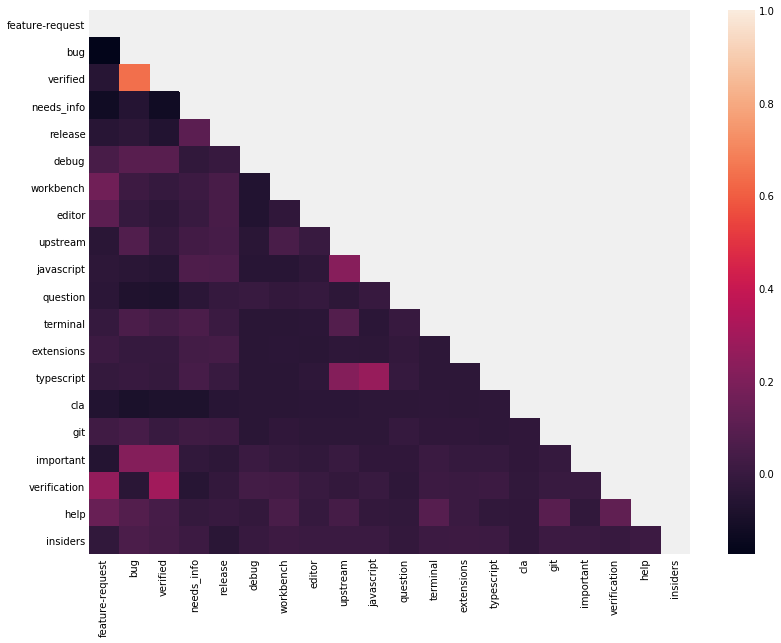

In [97]:
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,10))
sns.heatmap(correlation, mask=mask)

In [98]:
for label in label_cols:
    print("Corr between hours open and {} is {}".format(label, df[label].corr(df["hours_open"])))
    

Corr between hours open and feature-request is 0.469520523835781
Corr between hours open and bug is 0.034938666881996344
Corr between hours open and verified is -0.1122293931583018
Corr between hours open and needs_info is -0.05313375723937117
Corr between hours open and release is -0.04109424032380684
Corr between hours open and debug is 0.020894328005028575
Corr between hours open and workbench is 0.17978655455982046
Corr between hours open and editor is 0.11027487938480021
Corr between hours open and upstream is 0.0695562469721074
Corr between hours open and javascript is -0.04881643812512479
Corr between hours open and question is -0.040664455198288055
Corr between hours open and terminal is -0.020174759070487356
Corr between hours open and extensions is 0.0020968516107050137
Corr between hours open and typescript is -0.016077301266599876
Corr between hours open and cla is -0.0608710836087133
Corr between hours open and git is 0.021005984977957713
Corr between hours open and import

In [99]:
for label in label_cols:
    print("Corr between reassignments and {} is {}".format(label, df[label].corr(df["n_unassigned"])))

Corr between reassignments and feature-request is 0.17399365021205557
Corr between reassignments and bug is 0.10810341766723118
Corr between reassignments and verified is 0.10823614253625057
Corr between reassignments and needs_info is -0.032788559884722825
Corr between reassignments and release is -0.030787708924161637
Corr between reassignments and debug is 0.11435863804415919
Corr between reassignments and workbench is 0.1270032928267281
Corr between reassignments and editor is 0.05204078066911976
Corr between reassignments and upstream is -0.023792017953806265
Corr between reassignments and javascript is -0.043224005194045685
Corr between reassignments and question is -0.035976277370609204
Corr between reassignments and terminal is -0.03476158598767565
Corr between reassignments and extensions is -0.0032886179151098926
Corr between reassignments and typescript is -0.007824459320967841
Corr between reassignments and cla is -0.057991898741967834
Corr between reassignments and git is 

In [100]:
df["n_labels"].corr(df["n_unassigned"])

0.22032025480790182

## Important correlations:
* Number of reassignments positively correlated with hours the issue is opne (20%)
* Number of reassignments positively correlated with number of the labels of the issues (22%)
* **Some Labels have Strong correlation with the hours open:**   
        feature-request with 47%
        workbench with 18%
        help wanted with 14%

In [101]:
df[df["feature-request"]== 1]["hours_open"].mean()

5329.448815341081

In [102]:
df[df["verified"]== 1]["hours_open"].mean()

755.495865282213

In [113]:
df

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at', 'open_date', 'close_date', 'time_open', 'hours_open',
       'day_week', 'last_assigned', 'first_assigned', 'n_assigned',
       'n_unassigned', 'total_closed', 'total_open_issues_when_created',
       'feature-request', 'bug', 'verified', 'needs_info', 'release', 'debug',
       'workbench', 'editor', 'upstream', 'javascript', 'question', 'terminal',
       'extensions', 'typescript', 'cla', 'git', 'important', 'verification',
       'help', 'insiders'],
      dtype='object')

In [126]:
df[["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open       
                     mean  count
n_unassigned                    
0             1053.769423  34077
1             2904.803681   8238
2             3464.632523   2092
3             2678.250513    646
4             2976.782423    192

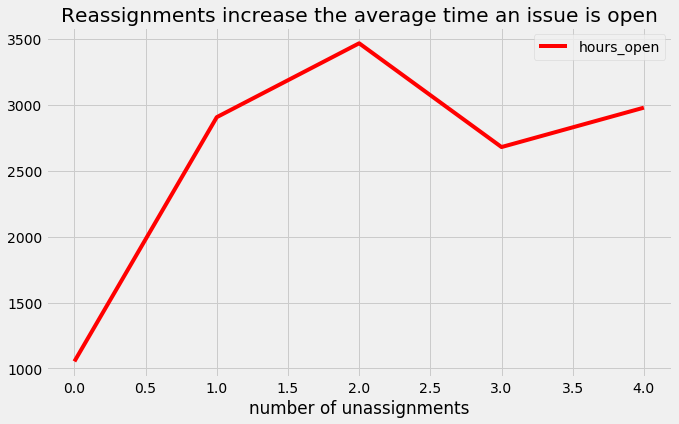

In [143]:
df[["n_unassigned", "hours_open"]].groupby("n_unassigned").mean()[:5].plot(figsize=(10,6), color="red")
plt.title("Reassignments increase the average time an issue is open")
plt.xlabel("number of unassignments");

In [128]:
df[df['feature-request'] == 1][["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open      
                      mean count
n_unassigned                    
0              4107.584963  3647
1              6379.741633  2604
2              7139.525508   675
3              7422.817655   143
4             10179.963581    28

In [129]:
df[df['bug'] == 1][["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open      
                     mean count
n_unassigned                   
0             1557.091587  7049
1             1924.375816  2630
2             2434.019714   735
3             2376.243407   205
4             4361.047505    60

In [130]:
df[df['workbench'] == 1][["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open      
                      mean count
n_unassigned                    
0              2700.063008  1417
1              4707.693106  1068
2              5802.432832   305
3              6518.997782    62
4             10392.898704    24

In [131]:
df[df['editor'] == 1][["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open      
                     mean count
n_unassigned                   
0             1938.076203  1560
1             4765.321832   749
2             5830.025292   178
3             5353.825952    35
4             5357.477685    12

In [132]:
df[df['debug'] == 1][["n_unassigned", "hours_open"]].groupby("n_unassigned").agg(["mean", "count"])[:5]

hours_open      
                     mean count
n_unassigned                   
0             1430.645567  1651
1             2230.993374  1081
2             2305.105952   276
3             2134.762273    77
4             1373.078368    24

In [145]:
df[df['debug'] == 1]["hours_open"].mean()

1804.3173481291792

In [146]:
df[df['editor'] == 1]["hours_open"].mean()

3114.38257620549

In [147]:
df.columns

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at', 'open_date', 'close_date', 'time_open', 'hours_open',
       'day_week', 'last_assigned', 'first_assigned', 'n_assigned',
       'n_unassigned', 'total_closed', 'total_open_issues_when_created',
       'feature-request', 'bug', 'verified', 'needs_info', 'release', 'debug',
       'workbench', 'editor', 'upstream', 'javascript', 'question', 'terminal',
       'extensions', 'typescript', 'cla', 'git', 'important', 'verification',
       'help', 'insiders'],
      dtype='object')

In [149]:
avg_hours = []
for column in df.columns[-20:]:
    avg_hours.append((column, df[df[column] == 1]["hours_open"].mean()))

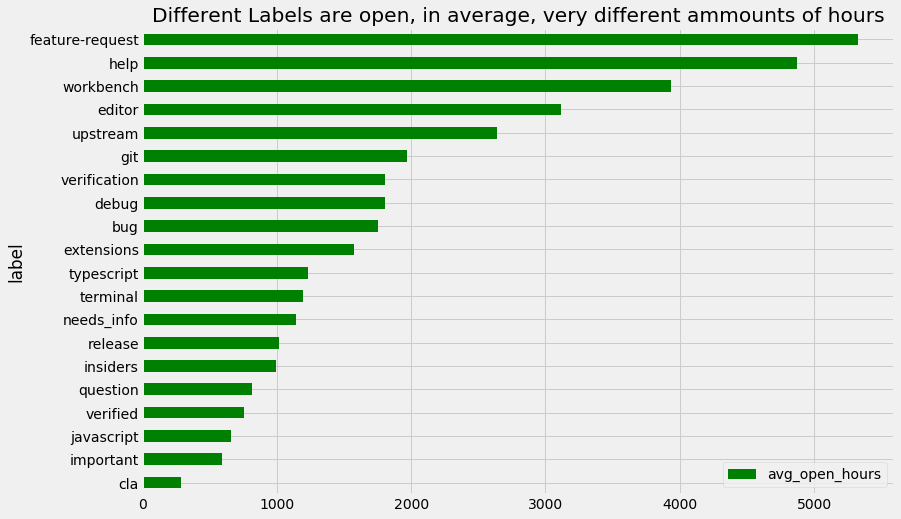

In [171]:
pd.DataFrame(avg_hours).rename(columns={0:"label", 1:"avg_open_hours"})\
                        .set_index("label").sort_values(by="avg_open_hours").plot.barh(figsize=(12,8), color="green")
plt.title("Different Labels are open, in average, very different ammounts of hours");

In [165]:
pd.DataFrame(avg_hours).rename(columns={0:"label", 1:"avg_open_hours"}).set_index("label")

,avg_open_hours
label,
feature-request,5329.448815
bug,1755.357676
verified,755.495865
needs_info,1141.030348
release,1015.392400
debug,1804.317348
workbench,3937.994090
editor,3114.382576
upstream,2636.626466


# filter issues created from the beginning of 2017

In [103]:
df_2017 = df[df["open_date"] > pd.to_datetime("2017")]

In [104]:
df.shape

(45356, 50)

In [105]:
df_2017.shape

(29562, 50)

In [106]:
def open_issues(date):
    
    closed_issues = ((df_2017["close_date"] < date) & (df_2017["close_date"] > pd.to_datetime("2010"))).sum()
    
    total_open = (df_2017["open_date"] < date).sum()
    
    return total_open - closed_issues

In [107]:
df_2017["open_issues_when_created"] =  df_2017["open_date"].apply(open_issues)

/home/alberto/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


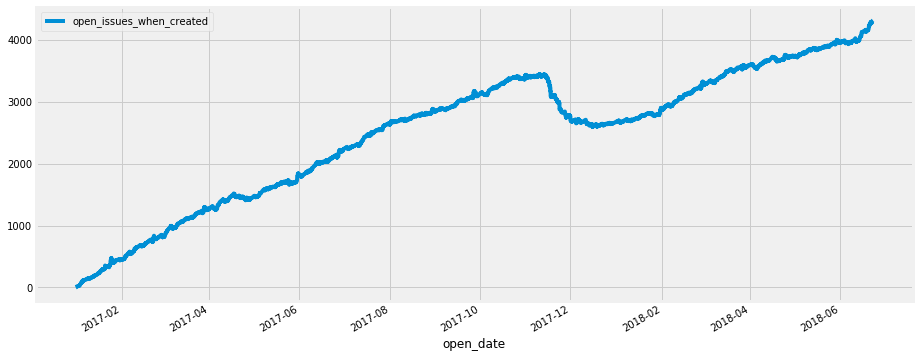

In [108]:
df_2017[["open_date", "open_issues_when_created"]].set_index("open_date").plot(figsize=(14,6))

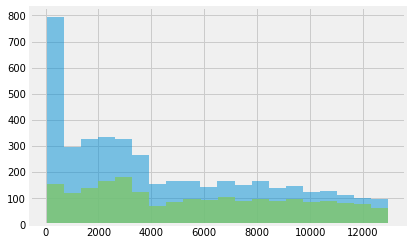

In [109]:
df_2017[(df_2017["closed_at"] == 0) & (df_2017["feature-request"] == 1)]["hours_open"].hist(bins=20, alpha=0.8, color="yellow")
df_2017[df_2017["closed_at"] == 0]["hours_open"].hist(bins=20, alpha=0.5)

In [110]:
df_2017.keys()

Index(['number', 'url', 'title', 'state', 'creator', 'created_at', 'comments',
       'subscribed', 'mentioned', 'labeled', 'unlabeled', 'status', 'assigned',
       'unassigned', 'crossreference', 'duplicate', 'n_labels', 'n_status',
       'closed_at', 'open_date', 'close_date', 'time_open', 'hours_open',
       'day_week', 'last_assigned', 'first_assigned', 'n_assigned',
       'n_unassigned', 'total_closed', 'total_open_issues_when_created',
       'feature-request', 'bug', 'verified', 'needs_info', 'release', 'debug',
       'workbench', 'editor', 'upstream', 'javascript', 'question', 'terminal',
       'extensions', 'typescript', 'cla', 'git', 'important', 'verification',
       'help', 'insiders', 'open_issues_when_created'],
      dtype='object')

In [111]:
df_2017["labeled"].values

array([list(['extensions']), list(['javascript']), nan, ..., nan,
       list(['editor', 'feature-request']),
       list(['bug', 'integrated-terminal', 'upstream', 'verified'])],
      dtype=object)